In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\Pro\End-to-end-churn-model\data\Bank-Customer-Attrition-Insights-Data.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [14]:
card_type_dis = df['card_type'].value_counts(normalize=True)*100
print(card_type_dis)

card_type
DIAMOND     25.07
GOLD        25.02
SILVER      24.96
PLATINUM    24.95
Name: proportion, dtype: float64


In [17]:
zero_balance_customer = df.query("balance==0")
zero_balance_customer.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,1,15598695,Fields,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464
3,4,15671610,Hooper,699,France,Female,39,1,0.0,2,0,0,93826.63,0,0,5,GOLD,350
6,7,15750014,Chikere,822,France,Male,50,7,0.0,2,1,1,10062.80,0,0,2,SILVER,206
11,12,15609011,Barry,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,0,3,GOLD,249
12,13,15703106,K'ung,476,France,Female,34,10,0.0,2,1,0,26260.98,0,0,3,SILVER,119


In [18]:
df.isna().sum()

rownumber             0
customerid            0
surname               0
creditscore           0
geography             0
gender                0
age                   0
tenure                0
balance               0
numofproducts         0
hascrcard             0
isactivemember        0
estimatedsalary       0
exited                0
complain              0
satisfaction_score    0
card_type             0
point_earned          0
dtype: int64

In [19]:
df.duplicated().any()

False

In [21]:
data = df.drop(["rownumber","customerid","surname"],axis=1)
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


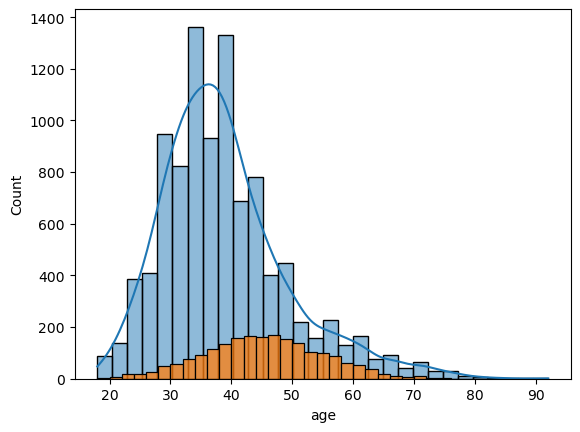

In [23]:
exit_age = data[data['exited'] == 1]
sns.histplot(data['age'],bins=30, kde=True)
sns.histplot(exit_age['age'])
plt.show()

In [25]:
num_by_gender = data['gender'].value_counts(normalize=True, ascending=True)
print(f"{num_by_gender*100}")

gender
Female    45.43
Male      54.57
Name: proportion, dtype: float64


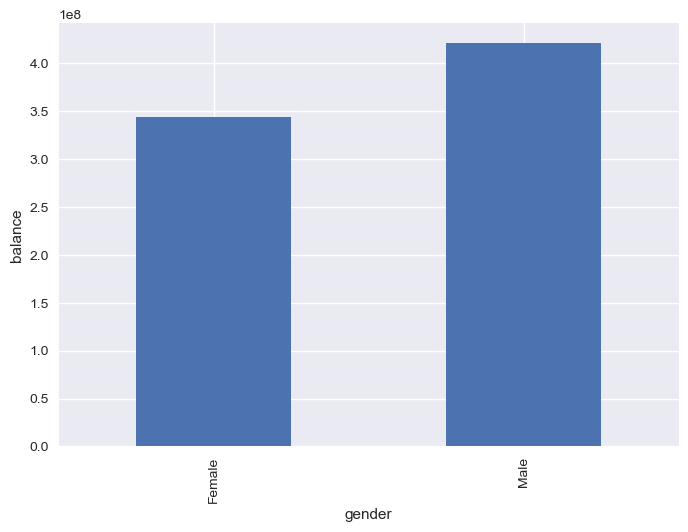

In [28]:
plt.style.use('seaborn-v0_8')
data.groupby('gender')['balance'].sum()\
.plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('balance')
plt.show()

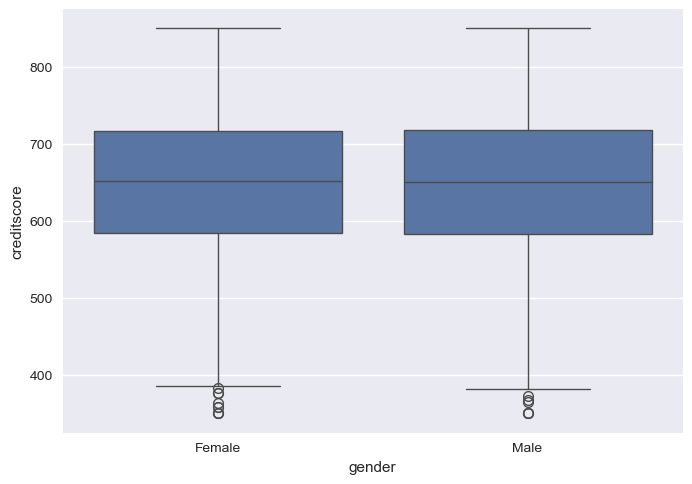

In [29]:
sns.boxplot(x='gender', y='creditscore', data=data)
plt.show()

In [40]:
filtered_female_exited = data.query("gender=='Female' and  exited==1")
filtered_male_exited = data.query("gender == 'Male' and exited==1")
"The number of women who left the bank are {} and men are {}".format(filtered_female_exited.shape[0],filtered_male_exited.shape[0])

'The number of women who left the bank are 1139 and men are 899'

In [41]:
data['card_type'] = data['card_type'].astype('category').cat.codes

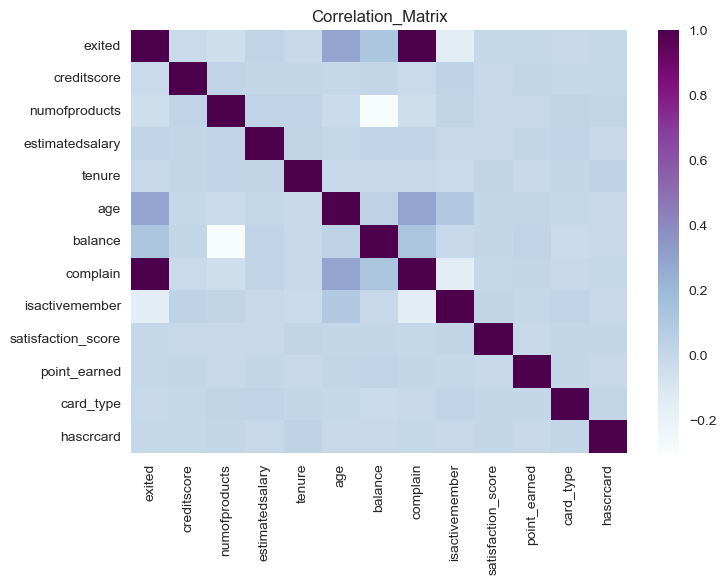

In [42]:
columns = ['exited','creditscore','numofproducts','estimatedsalary' 
           ,'tenure', 'age', 'balance','complain','isactivemember',
           'satisfaction_score','point_earned','card_type','hascrcard']
correlation = data[columns].corr(method='pearson')

sns.heatmap(correlation, cmap="BuPu")
plt.title('Correlation_Matrix')
plt.show()

In [45]:
from scipy.stats import pearsonr
r,p_value = pearsonr(data.complain, data.exited)
print(f"correlation coefficient:{r}, p_value:{p_value}")


correlation coefficient:0.9956925015718882, p_value:0.0


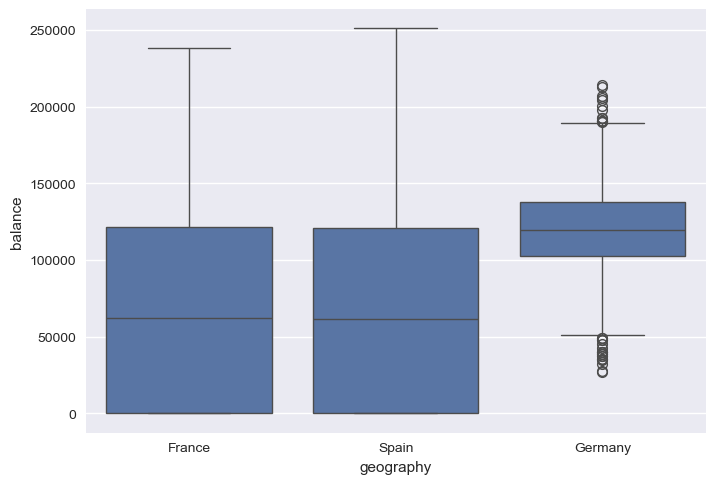

In [46]:
sns.boxplot(x='geography', y='balance', data=data)
plt.show()

In [47]:
pivoted_data = pd.crosstab(data['geography'], data['exited'])
pivoted_data

exited,0,1
geography,,
France,4203,811
Germany,1695,814
Spain,2064,413


In [49]:
#chi_square to tes if the Geography locations affects attition  rates 
#H0 = Exited is independent of geography
#H1 = exited is dependent of geography

import scipy.stats as stats

result = stats.chi2_contingency(pivoted_data)
print(result)


#pvalue is 5.24 which less than 0.05 we reject the null hypothesis
#hence there is significant between geography and exited


Chi2ContingencyResult(statistic=300.6264011211942, pvalue=5.245736109572763e-66, dof=2, expected_freq=array([[3992.1468, 1021.8532],
       [1997.6658,  511.3342],
       [1972.1874,  504.8126]]))


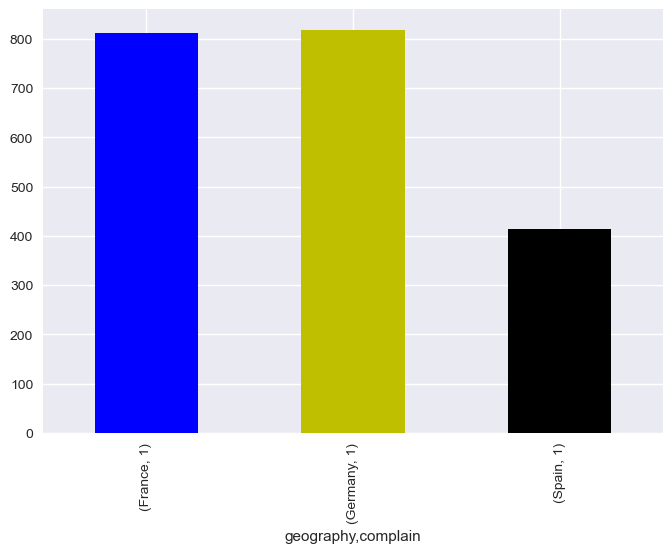

In [50]:
complaint_by_geography = data[data['complain']==1]
complaint_by_geography.groupby('geography')['complain'].value_counts()\
.plot(kind='bar', color=['b','y', 'k'])
plt.show()

In [51]:
#chi_square for whether there is a relationship between complaints and Geography
#H0: Geography and Complain re independent
#H1 :Geography and Complain are dependent
#alpha = 0.05
complaint_table = pd.crosstab(data['geography'],data['complain'])
contingency_results = stats.chi2_contingency(complaint_table)
print(contingency_results)
#p_value < 0.05,there is  significant relation between Geography and complaints so we reject the null hypothesis.

Chi2ContingencyResult(statistic=306.9111618426885, pvalue=2.2651031738286745e-67, dof=2, expected_freq=array([[3989.1384, 1024.8616],
       [1996.1604,  512.8396],
       [1970.7012,  506.2988]]))


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import mlflow
import mlflow.sklearn

In [54]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['geography'] = le.fit_transform(data['geography'])
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [64]:
# Create an experiment name (like a folder for all your bank project runs)
experiment_name = "XYZ_Bank_Churn_Experiment"
if not mlflow.get_experiment_by_name(experiment_name):
    mlflow.create_experiment(experiment_name)

mlflow.set_experiment(experiment_name)

2026/01/28 10:17:20 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/28 10:17:20 INFO mlflow.store.db.utils: Updating database tables
2026/01/28 10:17:20 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/28 10:17:20 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/28 10:17:20 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/01/28 10:17:20 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2026/01/28 10:17:20 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2026/01/28 10:17:20 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2026/01/28 10:17:20 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2026/01/28 10:17:20 INFO alembic.runtime.migration: Running 

<Experiment: artifact_location='file:///D:/Pro/End-to-end-churn-model/notebook/mlruns/1', creation_time=1769575641661, experiment_id='1', last_update_time=1769575641661, lifecycle_stage='active', name='XYZ_Bank_Churn_Experiment', tags={}>

In [69]:
with mlflow.start_run(run_name="Baseline_With_Complain"):
    
    # 1. Data Prep
    X = data.drop('exited', axis=1)
    y = data['exited']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # 2. Model Training
    params = {"max_depth": 10, "n_estimators": 100, "max_features": 'log2'}
    rf = RandomForestClassifier(**params)
    rf.fit(X_train, y_train)
    
    # 3. Evaluation
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    Report = classification_report(y_test, y_pred)
    
    # 4. Logging
    mlflow.log_params(params)
    mlflow.log_param("includes_complain", True)
    mlflow.log_metric("accuracy", acc) # This is a number, so it works!
    
    # FIX: Log the Report as Text (Artifact) instead of a Metric
    mlflow.log_text(Report, "classification_report.txt")
    
    # Save the model
    mlflow.sklearn.log_model(rf, name="model_with_leakage")
    
    print(f"Run Finished! Accuracy with complain: {acc}")

Run Finished! Accuracy with complain: 0.9986666666666667


AUC score: 0.9996846083189694


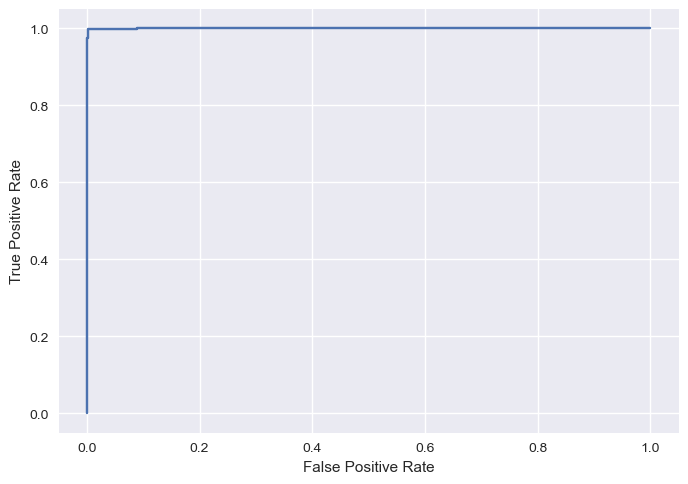

In [59]:
y_prob = rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(fpr,tpr)
print(f'AUC score: {roc_auc}')

plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [70]:
#Hyperparameter tuning and checking for data leakage :) since complain is used in 80% of the random forest

from sklearn.model_selection import cross_val_score

with mlflow.start_run(run_name="Cross_Validation_Leakage_Check"):
    
    # 1. Setup Data
    x_without_complain = data.drop(['complain', 'exited'], axis = 1)
    y = data['exited']
    params = {"max_depth": 10, "n_estimators": 100, "max_features": 'log2'}
    model = RandomForestClassifier(**params)
    
    # 2. Run Cross Validation
    # We log the results for the CLEAN model (without complain)
    scores_no_comp = cross_val_score(model, x_without_complain, y, cv=5)
    
    mean_acc = scores_no_comp.mean()
    std_dev = scores_no_comp.std()

    # 3. Log Everything to MLflow
    mlflow.log_params(params)
    mlflow.log_param("experiment_type", "Leakage_Validation")
    
    # We log the mean and the std_dev as separate metrics
    mlflow.log_metric("cv_mean_accuracy", mean_acc)
    mlflow.log_metric("cv_std_deviation", std_dev)
    
    print(f"Logged to MLflow -> Mean: {mean_acc:.4f}, Std: {std_dev:.4f}")
#the standard deviation is low which shows the model doesn't fluctuate a lot and is stable thus not overfitting
#the mean being 99.86% shows that our model is performing well
#As you can see the mean score increases upto 1 without complain and that improves the model's generalization across the board.
#Reasoning for doing this because of the feature_importance below which shows complain is adding noise and data leakage.

Logged to MLflow -> Mean: 0.8605, Std: 0.0073


<Axes: >

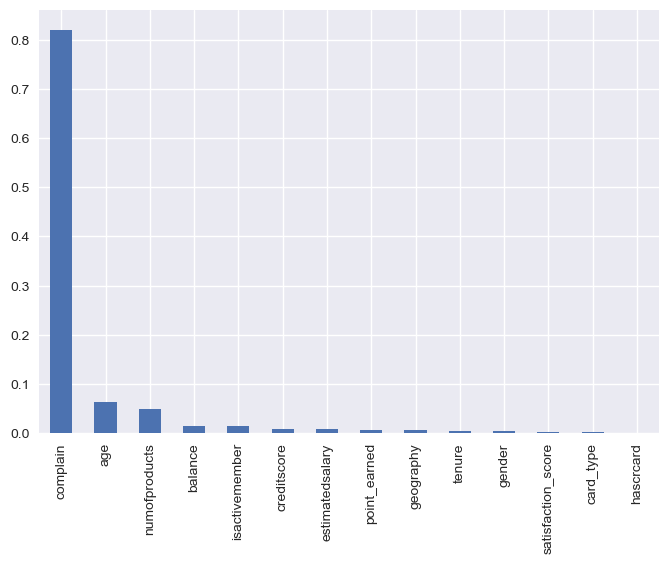

In [62]:
feature_importances = pd.Series(model.fit(X_train,y_train).feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar()
#The most important feature is complain,Age then NumofProducts